## Predicting for Customers, whether they will buy car insurance or not.

### This notebook is going to be focused on solving the problem of predicting whether a Customers, whether they will buy car insurance or not.




* Here, I will go through the whole process of creating a machine learning model on the famous "carInsurance dataset" , which is used by many people all over the world.




* We have general information about clients (age, job, etc.) as well as more specific information about the current insurance sell campaign (communication, last contact day) and previous campaigns (attributes like previous attempts, outcome).


## Importing LIbraries and Understanding Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Read the Data

In [2]:
Insurance_train_Data = pd.read_csv("carInsurance_train.csv")

Insurance_test_Data = pd.read_csv("carInsurance_test.csv")

In [3]:
Insurance_train_Data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [4]:
Insurance_test_Data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,4001,25,admin.,single,secondary,0,1,1,1,NaN,12,may,12,-1,0,NaN,17:17:42,17:18:06,NaN
1,4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NaN,09:13:44,09:14:37,NaN
2,4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NaN,15:24:07,15:25:51,NaN
3,4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NaN,09:43:44,09:48:01,NaN
4,4005,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,NaN,16:31:51,16:34:22,NaN


In [5]:
print("Insurance Train Data shape :" , Insurance_train_Data.shape)

print("Insurance Test Data shape  :" , Insurance_test_Data.shape)

Insurance Train Data shape : (4000, 19)
Insurance Test Data shape  : (1000, 19)


## Lets check the data type

In [6]:
Insurance_train_Data.dtypes

Id                   int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

In [7]:
Insurance_train_Data.count()

Id                  4000
Age                 4000
Job                 3981
Marital             4000
Education           3831
Default             4000
Balance             4000
HHInsurance         4000
CarLoan             4000
Communication       3098
LastContactDay      4000
LastContactMonth    4000
NoOfContacts        4000
DaysPassed          4000
PrevAttempts        4000
Outcome              958
CallStart           4000
CallEnd             4000
CarInsurance        4000
dtype: int64

## Let's check the summary of data

In [8]:
Insurance_train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [9]:
Insurance_train_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,4000.0,2000.50000,1154.844867,1.0,1000.75,2000.5,3000.25,4000.0
Age,4000.0,41.21475,11.550194,18.0,32.00,39.0,49.00,95.0
Default,4000.0,0.01450,0.119555,0.0,0.00,0.0,0.00,1.0
Balance,4000.0,1532.93725,3511.452489,-3058.0,111.00,551.5,1619.00,98417.0
HHInsurance,4000.0,0.49275,0.500010,0.0,0.00,0.0,1.00,1.0
CarLoan,4000.0,0.13300,0.339617,0.0,0.00,0.0,0.00,1.0
LastContactDay,4000.0,15.72125,8.425307,1.0,8.00,16.0,22.00,31.0
NoOfContacts,4000.0,2.60725,3.064204,1.0,1.00,2.0,3.00,43.0
DaysPassed,4000.0,48.70650,106.685385,-1.0,-1.00,-1.0,-1.00,854.0
PrevAttempts,4000.0,0.71750,2.078647,0.0,0.00,0.0,0.00,58.0


## Visualising Data

Text(0.5, 0, 'Age')

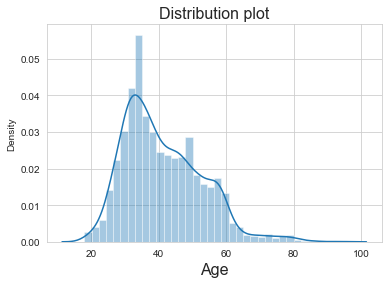

In [10]:
sns.set_style("whitegrid")
sns.distplot(Insurance_train_Data['Age'])
plt.title('Distribution plot', fontsize=16)
plt.xlabel('Age', fontsize=16)

Text(0.5, 1.0, 'Count Plot for Job')

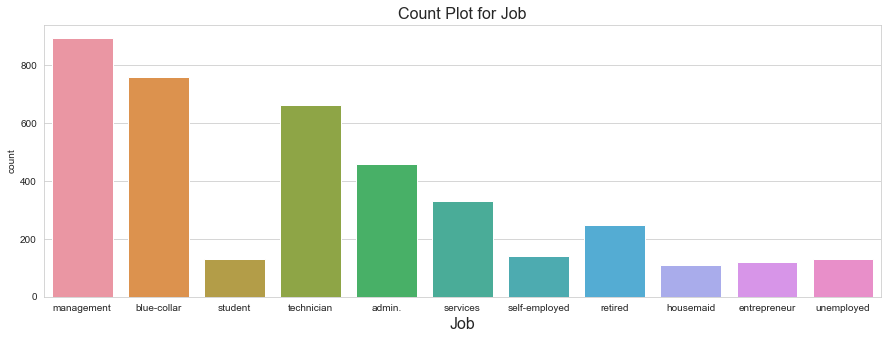

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.countplot(x='Job',data = Insurance_train_Data)
plt.xlabel('Job', fontsize=16)
plt.title('Count Plot for Job', fontsize=16)

Text(0.5, 1.0, 'Count Plot for Marital')

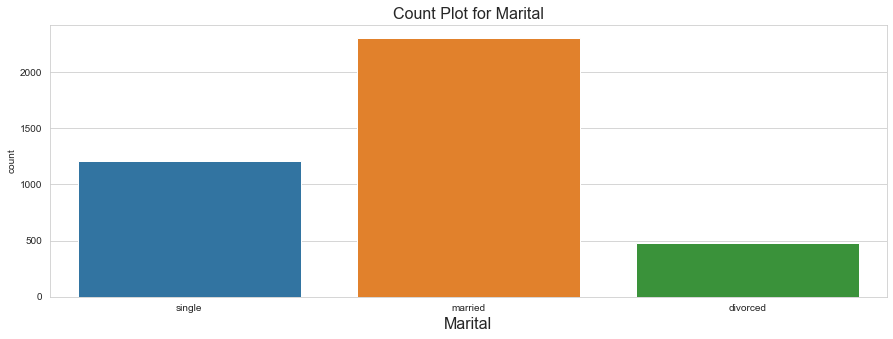

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.countplot(x='Marital',data = Insurance_train_Data)
plt.xlabel('Marital', fontsize=16)
plt.title('Count Plot for Marital', fontsize=16)

Text(0.5, 1.0, 'Count Plot for Education')

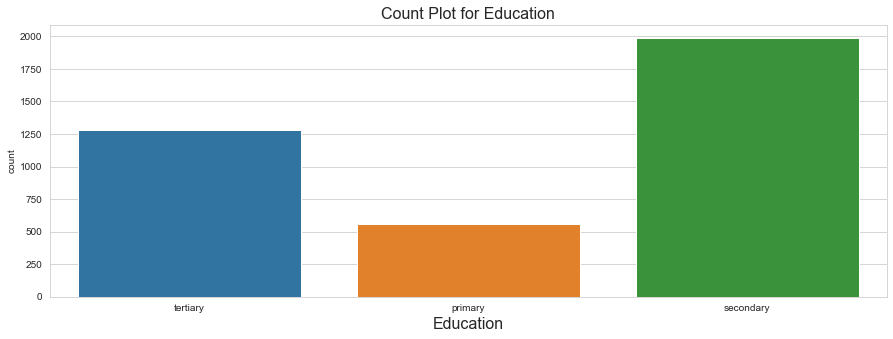

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.countplot(x='Education',data = Insurance_train_Data)
plt.xlabel('Education', fontsize=16)
plt.title('Count Plot for Education', fontsize=16)

Text(0.5, 1.0, 'Count Plot for CarInsurance ')

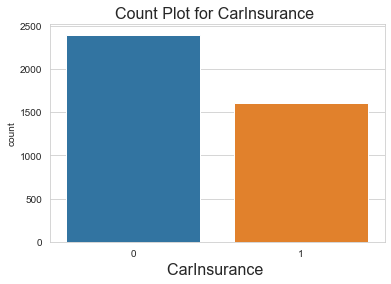

In [14]:
sns.set_style("whitegrid")
sns.countplot(x = 'CarInsurance', data = Insurance_train_Data)
plt.xlabel('CarInsurance ', fontsize = 16)
plt.title('Count Plot for CarInsurance ', fontsize = 16)

* Maximum People don't have Car Insurance.

<AxesSubplot:>

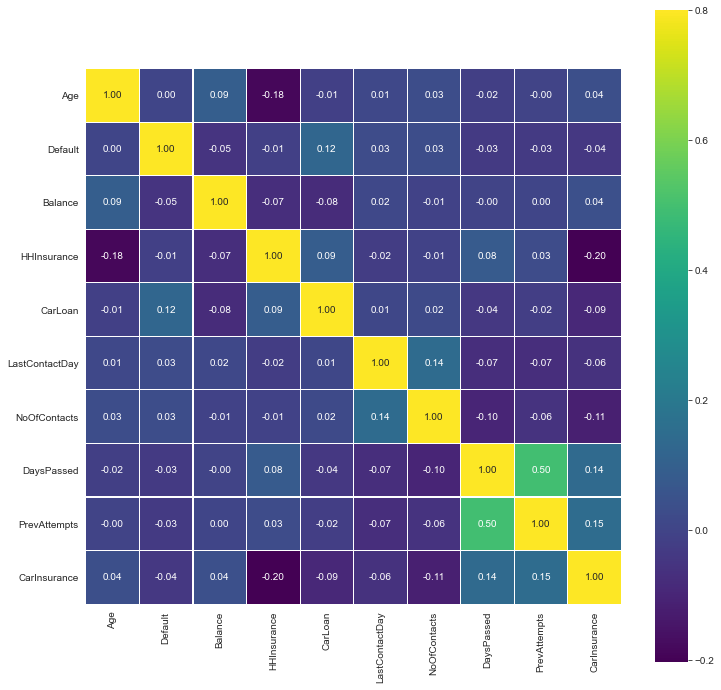

In [15]:
# First check out correlations among numeric features
# Heatmap is a useful tool to get a quick understanding of which variables are important

colormap = plt.cm.viridis
cor = Insurance_train_Data.corr()
cor = cor.drop(['Id'],axis=1).drop(['Id'],axis=0)
plt.figure(figsize=(12,12))
sns.heatmap(cor,vmax=0.8,cmap=colormap,annot=True,fmt='.2f',square=True,annot_kws={'size':10},linecolor='white',linewidths=0.1)

* Features are fairly independent, except DaysPassed and PreAttempts. 


* Insurance success is positively correlated with PreAttemps,DaysPassed,Age and Balance, and negatively correlated with default, HHInsurance, CarLoan, LastContactDay and NoOfContacts.

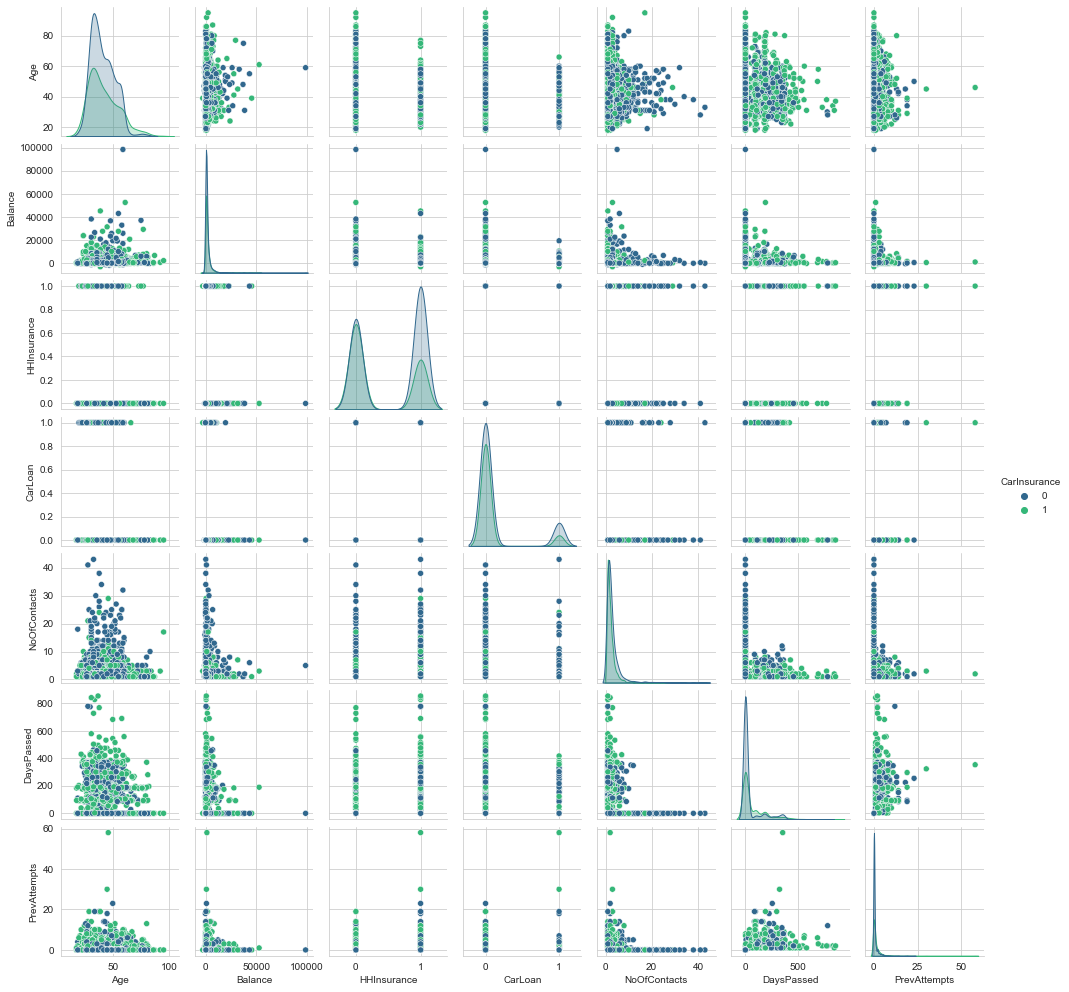

In [16]:
# Visualise the relationship between the features and the response using scatterplots
# Next, pair plot some important features

imp_feats = ['CarInsurance','Age','Balance','HHInsurance', 'CarLoan','NoOfContacts','DaysPassed','PrevAttempts']

sns.pairplot(Insurance_train_Data[imp_feats], hue = 'CarInsurance', palette = 'viridis', size = 2.0)

plt.show()

*  Age: It's interesting to see that seniors are more likely to buy car insurance.


*  Balance: For balance, the data point at the upper right corner might be an outlier


*  HHInsurance: Households insured are less likely to buy car insurance


*  CarLoan: People with car loan are less likely to buy


*  NoOfContacts: Too many contacts causes customer attrition


*  DaysPassed: It looks like the more day passed since the last contact, the better


*  PrevAttempts: Also, more previous attempts, less likely to buy. There is a potential outlier here

Text(0.5, 1.0, 'Distribution Plot of Age with CarInsurance')

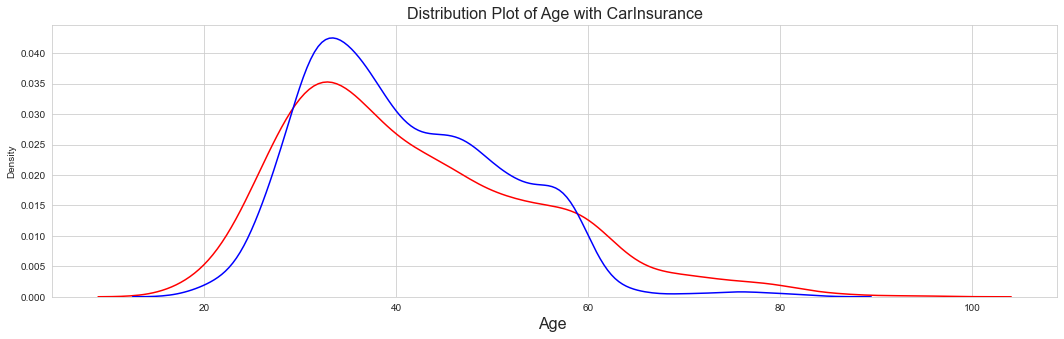

In [17]:
plt.figure(figsize=(18,5))

sns.distplot(Insurance_train_Data['Age'][Insurance_train_Data['CarInsurance']==1],hist=False,color='red')

sns.distplot(Insurance_train_Data['Age'][Insurance_train_Data['CarInsurance']==0],hist=False,color='blue')

plt.xlabel('Age ', fontsize = 16)
plt.title('Distribution Plot of Age with CarInsurance', fontsize = 16)

# plot of age vs car insurance value [1 , 0]

* It looks like young people(<=30 years) and seniors are more likely to buy car insurance from this bank.

Text(0.5, 1.0, 'Plot for Job with CarInsurance')

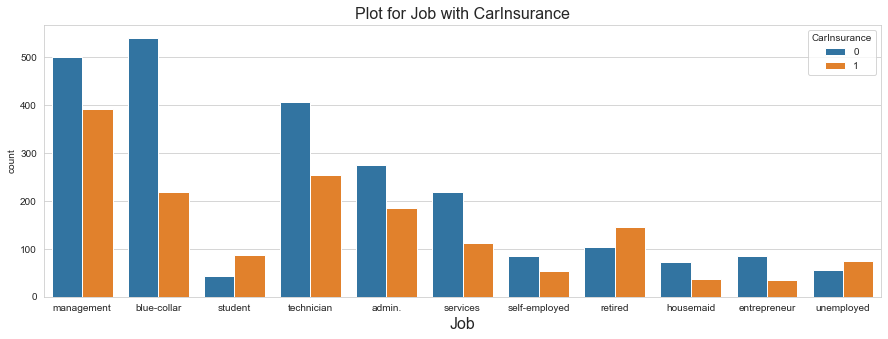

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.countplot(x = 'Job', hue = 'CarInsurance', data = Insurance_train_Data)
plt.xlabel('Job', fontsize = 16)
plt.title('Plot for Job with CarInsurance', fontsize = 16)

* Student are most likely to buy insurance, followed by retired and unemployed folks.

Text(0.5, 1.0, 'Plot for Marital with CarInsurance')

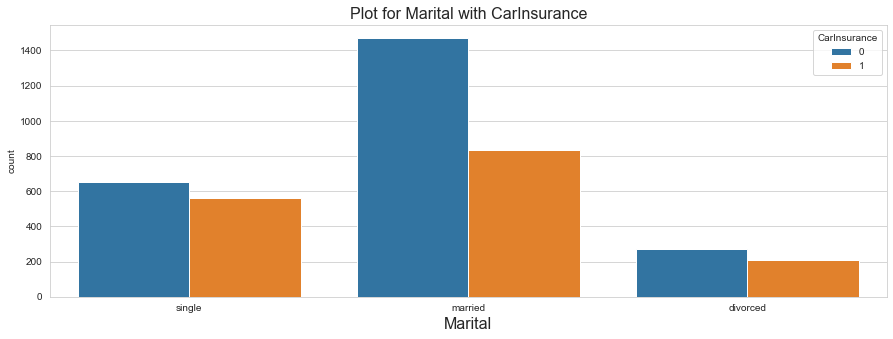

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.countplot(x = 'Marital', hue = 'CarInsurance', data = Insurance_train_Data)
plt.xlabel('Marital', fontsize = 16)
plt.title('Plot for Marital with CarInsurance', fontsize = 16)

* Married people are least likely to buy car insurance. Opportunities for developing family insurance business.

Text(0.5, 1.0, 'Plot for Education with CarInsurance')

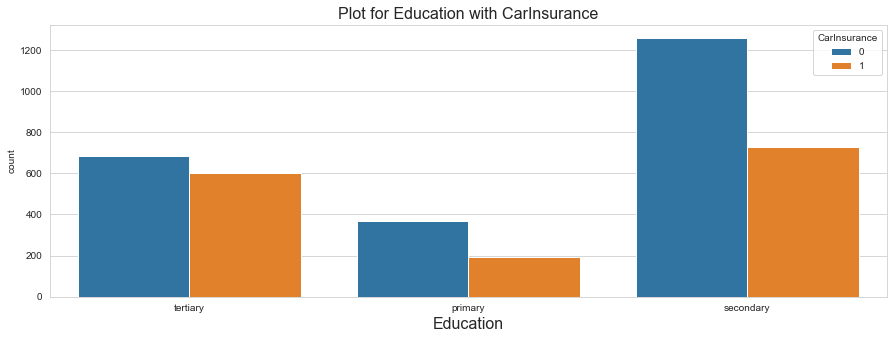

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.countplot(x = 'Education', hue = 'CarInsurance', data = Insurance_train_Data)
plt.xlabel('Education', fontsize = 16)
plt.title('Plot for Education with CarInsurance', fontsize = 16)

* People with higher education are more likely to buy insurance.

Text(0.5, 1.0, 'Plot for HHInsurance with CarInsurance')

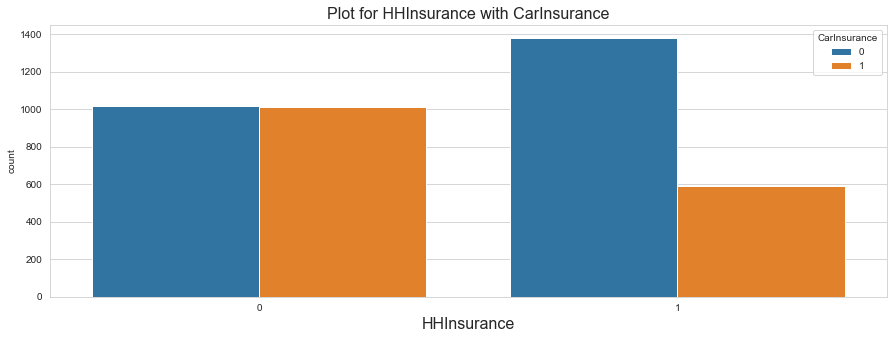

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.countplot(x = 'HHInsurance', hue = 'CarInsurance', data = Insurance_train_Data)
plt.xlabel('HHInsurance', fontsize = 16)
plt.title('Plot for HHInsurance with CarInsurance', fontsize = 16)

Text(0.5, 1.0, 'Plot for CarLoan with CarInsurance')

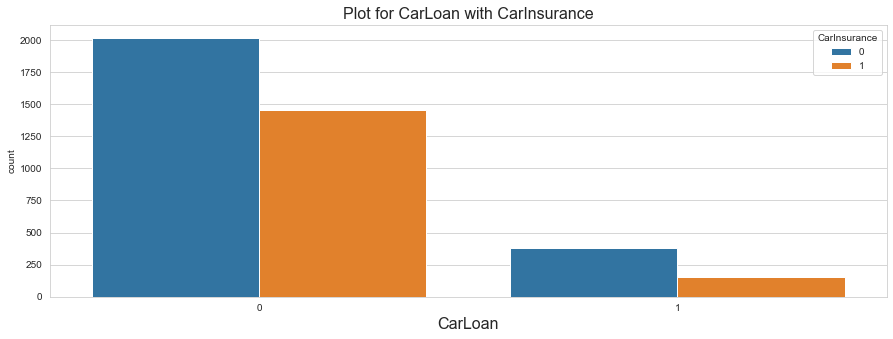

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.countplot(x = 'CarLoan', hue = 'CarInsurance', data = Insurance_train_Data)
plt.xlabel('CarLoan', fontsize = 16)
plt.title('Plot for CarLoan with CarInsurance', fontsize = 16)

## Removing outliers

* From the pairplot, we can see there is an outlier with extreme high balance. Drop that obs here.

In [23]:
Insurance_train_Data[Insurance_train_Data['Balance']>80000]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
1742,1743,59,management,married,tertiary,0,98417,0,0,telephone,20,nov,5,-1,0,NaN,10:51:42,10:54:07,0


In [24]:
Insurance_train_Data = Insurance_train_Data.drop(Insurance_train_Data[Insurance_train_Data.index==1742].index)

## Combining both DataSets (Train & Test)

In [25]:
Insurance_Combined_Data = pd.concat([Insurance_train_Data,Insurance_test_Data], keys=('Train','Test'))

Insurance_Combined_Data.drop(['Id','CallStart','CallEnd','CarInsurance'],axis=1,inplace=True)

Insurance_Combined_Data

Age          Job  Marital  Education  Default  Balance  \
Train 0     32   management   single   tertiary        0     1218   
      1     32  blue-collar  married    primary        0     1156   
      2     29   management   single   tertiary        0      637   
      3     25      student   single    primary        0      373   
      4     30   management  married   tertiary        0     2694   
...        ...          ...      ...        ...      ...      ...   
Test  995   31       admin.   single  secondary        0      131   
      996   52   management  married   tertiary        0     2635   
      997   46   technician  married   tertiary        0     3009   
      998   60      retired  married  secondary        0     7038   
      999   28   management   single   tertiary        0      957   

           HHInsurance  CarLoan Communication  LastContactDay  \
Train 0              1        0     telephone              28   
      1              1        0           NaN              26   
      2              1        0      cellular               3   
      3              1        0      cellular              11   
      4              0        0      cellular               3   
...                ...      ...           ...             ...   
Test  995            1        0      cellular              15   
      996            0        0      cellular               6   
      997            0        0      cellular               4   
      998            0        0     telephone               7   
      999            0        0      cellular              25   

          LastContactMonth  NoOfContacts  DaysPassed  PrevAttempts  Outcome  
Train 0                jan             2          -1             0      NaN  
      1                may             5          -1             0      NaN  
      2                jun             1         119             1  failure  
      3                may             2          -1             0      NaN  
      4                jun             1          -1             0      NaN  
...                    ...           ...         ...           ...      ...  
Test  995              jun             1          -1             0      NaN  
      996              sep             1         108             8  success  
      997              aug             2          -1             0      NaN  
      998              oct             4          -1             0      NaN  
      999              may             2          -1             0      NaN  

[4999 rows x 15 columns]

In [26]:
Insurance_Combined_Data.shape

(4999, 15)

## Total Missing Values

In [27]:
# Total missing values in every column
total_missing = Insurance_Combined_Data.isnull().sum()

# Calculate percentage
percentge = total_missing/Insurance_Combined_Data.isnull().count()

# Combine total and percentage values
NAs = pd.concat([total_missing,percentge],axis=1,keys=('Total','Percentge'))

# Getting columns where there are missing values
NAs[NAs.Total>0].sort_values(by='Total',ascending=False)

,Total,Percentge
Outcome,3798,0.759752
Communication,1123,0.224645
Education,216,0.043209
Job,24,0.004801


* Outcome have approx 75.9 % missing value.
* Communication have 22% missing value.
* Education have 0.4% missing value.
* Job have 24 missing value.

## Handling Missing value

### 1. Outcome

In [28]:
Insurance_Combined_Data.groupby('Outcome')['Age'].nunique()

Outcome
failure    56
other      49
success    60
Name: Age, dtype: int64

In [29]:
Insurance_Combined_Data.groupby('Outcome')['Age'].count()

Outcome
failure    548
other      248
success    405
Name: Age, dtype: int64

In [30]:
# Fill missing outcome as not in previous campaign, we are adding one category to Outcome
# We will add category if the value of DaysPassed is -1
# Can you do it other ways.. yes this is one way of doing you can do it other ways also.

Insurance_Combined_Data.loc[Insurance_Combined_Data['DaysPassed']==-1,'Outcome']='NoPrev'

In [31]:
Insurance_Combined_Data.groupby('Outcome')['Age'].count()

Outcome
NoPrev     3798
failure     548
other       248
success     405
Name: Age, dtype: int64

### 2. Communication

In [32]:
Insurance_Combined_Data['Communication'].value_counts()

cellular     3529
telephone     347
Name: Communication, dtype: int64

In [33]:
# Fill missing Communication as None

Insurance_Combined_Data['Communication'].fillna('None',inplace=True)

In [34]:
Insurance_Combined_Data['Communication'].value_counts()

cellular     3529
None         1123
telephone     347
Name: Communication, dtype: int64

### 3.  Education

*  Let us try to do the mapping of Education to the job. Yes jobs are related to the education.

In [35]:
Insurance_Combined_Data['Education'].value_counts()

secondary    2489
tertiary     1600
primary       694
Name: Education, dtype: int64

In [36]:
# Create job-education level mode mapping
edu_mode=[]

# What are different Job Types
job_types = Insurance_Combined_Data.Job.value_counts().index

# Checking which job is most 
Insurance_Combined_Data['Job'].value_counts()

management       1113
blue-collar       937
technician        823
admin.            586
services          414
retired           326
self-employed     182
unemployed        164
student           158
entrepreneur      149
housemaid         123
Name: Job, dtype: int64

In [37]:
# Now according to the job type we will crate a mapping where the job and mode of education is there.

# It means when there are many people in the managment job then most of them are in which education.

# We can find that in below mapping

for job in job_types:
    mode = Insurance_Combined_Data[Insurance_Combined_Data.Job==job]['Education'].value_counts().nlargest(1).index
    edu_mode = np.append(edu_mode,mode)
edu_map=pd.Series(edu_mode,index=Insurance_Combined_Data.Job.value_counts().index)

edu_map

management        tertiary
blue-collar      secondary
technician       secondary
admin.           secondary
services         secondary
retired          secondary
self-employed     tertiary
unemployed       secondary
student          secondary
entrepreneur      tertiary
housemaid          primary
dtype: object

In [38]:
# nlargest = means
# Return the first n rows ordered by columns in descending order.
#Return the first n rows with the largest values in columns, in descending order. 
#The columns that are not specified are returned as well, but not used for ordering.
#This method is equivalent to df.sort_values(columns, ascending=False).head(n), but more performant.

In [39]:
# Apply the mapping to missing eductaion obs. We will replace education now by jobs value

for j in job_types:
    Insurance_Combined_Data.loc[(Insurance_Combined_Data['Education'].isnull()) & (Insurance_Combined_Data['Job']==j),'Education'] = edu_map.loc[edu_map.index==j][0]

# For those who are not getting mapped we will create a new category as None

Insurance_Combined_Data['Education'].fillna('None',inplace=True)

### 4.  Job

In [40]:
# Fill missing job with none

Insurance_Combined_Data['Job'].fillna('None',inplace=True)

In [41]:
Insurance_Combined_Data.dropna(inplace=True)

In [42]:
Insurance_Combined_Data.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
dtype: int64

## Separate the Numerical Columns

In [43]:
Numerical_cols = Insurance_Combined_Data.select_dtypes(include = np.number)

Numerical_cols.head()

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
Train 0   32        0     1218            1        0              28   
      1   32        0     1156            1        0              26   
      2   29        0      637            1        0               3   
      3   25        0      373            1        0              11   
      4   30        0     2694            0        0               3   

         NoOfContacts  DaysPassed  PrevAttempts  
Train 0             2          -1             0  
      1             5          -1             0  
      2             1         119             1  
      3             2          -1             0  
      4             1          -1             0

## Separate the Categorical Columns

In [44]:
Categorical_cols = Insurance_Combined_Data.select_dtypes(include = 'object')

Categorical_cols

Job  Marital  Education Communication LastContactMonth  \
Train 0     management   single   tertiary     telephone              jan   
      1    blue-collar  married    primary          None              may   
      2     management   single   tertiary      cellular              jun   
      3        student   single    primary      cellular              may   
      4     management  married   tertiary      cellular              jun   
...                ...      ...        ...           ...              ...   
Test  995       admin.   single  secondary      cellular              jun   
      996   management  married   tertiary      cellular              sep   
      997   technician  married   tertiary      cellular              aug   
      998      retired  married  secondary     telephone              oct   
      999   management   single   tertiary      cellular              may   

           Outcome  
Train 0     NoPrev  
      1     NoPrev  
      2    failure  
      3     NoPrev  
      4     NoPrev  
...            ...  
Test  995   NoPrev  
      996  success  
      997   NoPrev  
      998   NoPrev  
      999   NoPrev  

[4999 rows x 6 columns]

## Creating Dummy variables

In [45]:
Insurance_Combined_Data_dummies = pd.get_dummies(Categorical_cols)

Insurance_Combined_Data_dummies.head()

Job_None  Job_admin.  Job_blue-collar  Job_entrepreneur  \
Train 0         0           0                0                 0   
      1         0           0                1                 0   
      2         0           0                0                 0   
      3         0           0                0                 0   
      4         0           0                0                 0   

         Job_housemaid  Job_management  Job_retired  Job_self-employed  \
Train 0              0               1            0                  0   
      1              0               0            0                  0   
      2              0               1            0                  0   
      3              0               0            0                  0   
      4              0               1            0                  0   

         Job_services  Job_student  ...  LastContactMonth_jun  \
Train 0             0            0  ...                     0   
      1             0            0  ...                     0   
      2             0            0  ...                     1   
      3             0            1  ...                     0   
      4             0            0  ...                     1   

         LastContactMonth_mar  LastContactMonth_may  LastContactMonth_nov  \
Train 0                     0                     0                     0   
      1                     0                     1                     0   
      2                     0                     0                     0   
      3                     0                     1                     0   
      4                     0                     0                     0   

         LastContactMonth_oct  LastContactMonth_sep  Outcome_NoPrev  \
Train 0                     0                     0               1   
      1                     0                     0               1   
      2                     0                     0               0   
      3                     0                     0               1   
      4                     0                     0               1   

         Outcome_failure  Outcome_other  Outcome_success  
Train 0                0              0                0  
      1                0              0                0  
      2                1              0                0  
      3                0              0                0  
      4                0              0                0  

[5 rows x 38 columns]

## Combine the Numerical And Dummy Variable

In [46]:
Insurance_Data_dummy = pd.concat([Numerical_cols, Insurance_Combined_Data_dummies], axis=1)

Insurance_Data_dummy.head()

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
Train 0   32        0     1218            1        0              28   
      1   32        0     1156            1        0              26   
      2   29        0      637            1        0               3   
      3   25        0      373            1        0              11   
      4   30        0     2694            0        0               3   

         NoOfContacts  DaysPassed  PrevAttempts  Job_None  ...  \
Train 0             2          -1             0         0  ...   
      1             5          -1             0         0  ...   
      2             1         119             1         0  ...   
      3             2          -1             0         0  ...   
      4             1          -1             0         0  ...   

         LastContactMonth_jun  LastContactMonth_mar  LastContactMonth_may  \
Train 0                     0                     0                     0   
      1                     0                     0                     1   
      2                     1                     0                     0   
      3                     0                     0                     1   
      4                     1                     0                     0   

         LastContactMonth_nov  LastContactMonth_oct  LastContactMonth_sep  \
Train 0                     0                     0                     0   
      1                     0                     0                     0   
      2                     0                     0                     0   
      3                     0                     0                     0   
      4                     0                     0                     0   

         Outcome_NoPrev  Outcome_failure  Outcome_other  Outcome_success  
Train 0               1                0              0                0  
      1               1                0              0                0  
      2               0                1              0                0  
      3               1                0              0                0  
      4               1                0              0                0  

[5 rows x 47 columns]

In [47]:
Insurance_Data_dummy.isnull().sum()

Age                        0
Default                    0
Balance                    0
HHInsurance                0
CarLoan                    0
LastContactDay             0
NoOfContacts               0
DaysPassed                 0
PrevAttempts               0
Job_None                   0
Job_admin.                 0
Job_blue-collar            0
Job_entrepreneur           0
Job_housemaid              0
Job_management             0
Job_retired                0
Job_self-employed          0
Job_services               0
Job_student                0
Job_technician             0
Job_unemployed             0
Marital_divorced           0
Marital_married            0
Marital_single             0
Education_None             0
Education_primary          0
Education_secondary        0
Education_tertiary         0
Communication_None         0
Communication_cellular     0
Communication_telephone    0
LastContactMonth_apr       0
LastContactMonth_aug       0
LastContactMonth_dec       0
LastContactMon

## Indetify the Independent and Dependent variable

In [48]:
idx = pd.IndexSlice
train_df = Insurance_Data_dummy.loc[idx[["Train",],:]]
test_df = Insurance_Data_dummy.loc[idx[["Test",],:]]

In [49]:
train_label = Insurance_train_Data['CarInsurance']

In [50]:
print(train_df.shape)
print(test_df.shape)

(3999, 47)
(1000, 47)


## Splitting the data in Training and Test set

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df, train_label, train_size=0.7 , random_state=50)

## Performing Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [53]:
lr.fit(X_train,y_train)

LogisticRegression()

## Predictions

In [54]:
y_pred = lr.predict(X_test)

## Confusion Matrix

In [55]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test,y_pred)

CM

array([[639,  83],
       [271, 207]], dtype=int64)

Text(0.5, 16.0, 'Predicted label')

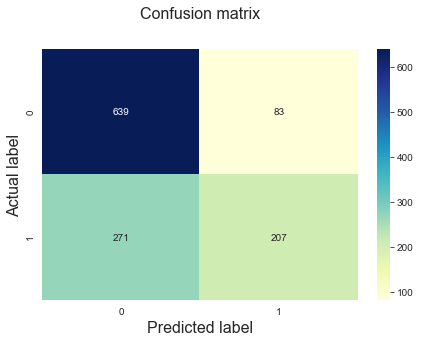

In [57]:
sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1, fontsize = 16)
plt.ylabel('Actual label', fontsize = 16)
plt.xlabel('Predicted label', fontsize = 16)

## Model Performance Metrics

In [58]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

roc_auc = roc_auc_score(y_test, y_pred)

In [59]:
print('Accuracy is  :' ,accuracy)
print('F1 score is  :' ,f1)
print('Precision is :' ,precision)
print('Recall is    :' ,recall)
print('Roc Auc is   :' ,roc_auc)

Accuracy is  : 0.705
F1 score is  : 0.5390624999999999
Precision is : 0.7137931034482758
Recall is    : 0.4330543933054393
Roc Auc is   : 0.6590479722759883


* Accuracy = 70.5 %


* F1 Score = 53.9 %


* Precision = 71.3 %


* Recall = 43.3 %


* ROC Area Under Curve = 65.9 %

## Plotting ROC Curve

In [60]:
from sklearn.metrics import roc_curve

FPR,TPR,Thresholds = roc_curve(y_test,lr.predict_proba(X_test)[:,1])

In [61]:

fpr_series = pd.Series(FPR)
tpr_series = pd.Series(TPR)
thresholds_series = pd.Series(Thresholds)

df = pd.concat([fpr_series,tpr_series,thresholds_series],axis=1,keys=['FPR','TPR','THRESHOLD'])
df.sort_values(by='TPR',ascending=False)

,FPR,TPR,THRESHOLD
496,1.000000,1.000000,0.015290
495,0.994460,1.000000,0.103420
494,0.994460,0.997908,0.107033
493,0.983380,0.997908,0.119262
492,0.983380,0.995816,0.120271
...,...,...,...
4,0.002770,0.025105,0.908247
3,0.001385,0.025105,0.921599
2,0.001385,0.002092,0.994076
1,0.000000,0.002092,0.999999


Text(0.5, 1.0, 'Receiver operating characteristic (ROC) curve')

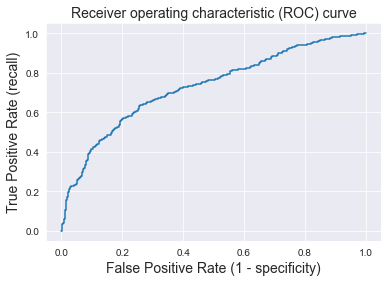

In [62]:
sns.set_style("darkgrid")
plt.plot(FPR,TPR)
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve', fontsize=14)

In [63]:
# getting the probabilities of our predictions

y_scores = lr.predict_proba(X_train)
y_scores = y_scores[:,1]

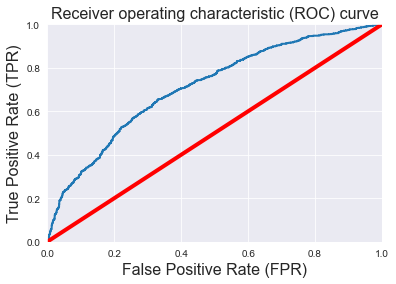

In [64]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
    plt.title('Receiver operating characteristic (ROC) curve' , fontsize=16)    

    

plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

* The red line in the middel represents a purely random classifier and therefore your classifier should be as far away from it as possible.